<a href="https://colab.research.google.com/github/meraldin/pacmann-datascience-bootcamp/blob/main/04_probability/Probability_Mentoring_Week_6_Shafa_Aldiena_Meraldin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOMOR 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive//My Drive/PACMANN/PORTOFOLIO/PROBABILITY/subscription.csv'
df = pd.read_csv(file_path)

# Lihat 5 baris pertama
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,user_id,date_leads,date_convert,category
0,18364,2024-04-01 00:00:38,2024-04-04 03:51:02,Silver Package
1,13783,2024-04-01 00:01:09,2024-04-05 22:20:21,Silver Package
2,3112,2024-04-01 00:01:17,2024-04-01 17:46:53,Gold Package
3,21076,2024-04-01 00:01:24,2024-04-02 05:32:36,Silver Package
4,12005,2024-04-01 00:01:56,2024-04-09 15:23:32,Gold Package


In [ ]:
#Tambah kolom days_to_convert ke dataset

#Memastikan data_leads dan data_convert dibaca sebagai datetime
df['date_leads'] = pd.to_datetime(df['date_leads'])
df['date_convert'] = pd.to_datetime(df['date_convert'])

#Menghitung days_to_convert
df['days_to_convert'] = (df['date_convert'] - df['date_leads']).dt.days
df['days_to_convert'] = (df['date_convert'] - df['date_leads']).dt.total_seconds() / (3600 * 24)
df[['user_id', 'date_leads', 'date_convert', 'days_to_convert']].head()

# Simpan ke file baru
output_path = '/content/drive/My Drive/PACMANN/PORTOFOLIO/PROBABILITY/subscription_with_days.csv'
df.to_csv(output_path, index=False)

# Load ulang file yang sudah ditambah kolom
df = pd.read_csv(output_path)

# Pastikan kolom tanggal tetap diubah ke datetime
df['date_leads'] = pd.to_datetime(df['date_leads'])
df['date_convert'] = pd.to_datetime(df['date_convert'])

# Lihat 5 baris pertama
df.head()

,user_id,date_leads,date_convert,category,days_to_convert
0,18364,2024-04-01 00:00:38,2024-04-04 03:51:02,Silver Package,3.16
1,13783,2024-04-01 00:01:09,2024-04-05 22:20:21,Silver Package,4.93
2,3112,2024-04-01 00:01:17,2024-04-01 17:46:53,Gold Package,0.74
3,21076,2024-04-01 00:01:24,2024-04-02 05:32:36,Silver Package,1.23
4,12005,2024-04-01 00:01:56,2024-04-09 15:23:32,Gold Package,8.64


In [ ]:
# Filter kategori

gold = df[df['category'] == 'Gold Package']
silver = df[df['category'] == 'Silver Package']

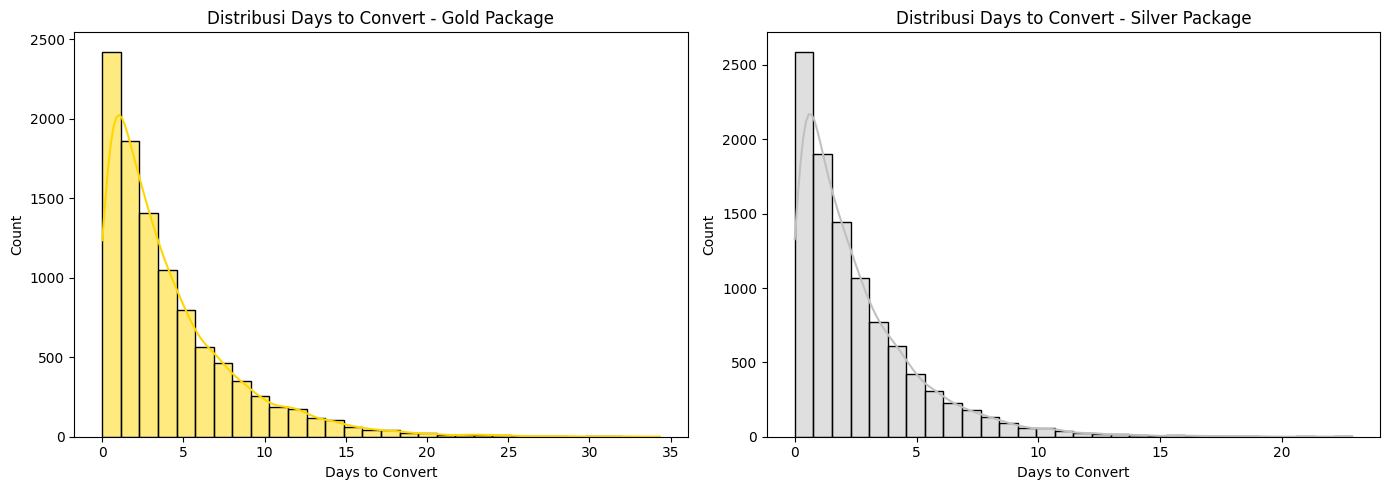

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Gold
plt.subplot(1, 2, 1)
sns.histplot(gold['days_to_convert'], kde=True, bins=30, color='gold')
plt.title('Distribusi Days to Convert - Gold Package')
plt.xlabel('Days to Convert')

# Silver
plt.subplot(1, 2, 2)
sns.histplot(silver['days_to_convert'], kde=True, bins=30, color='silver')
plt.title('Distribusi Days to Convert - Silver Package')
plt.xlabel('Days to Convert')

plt.tight_layout()
plt.show()


In [ ]:
# Hitung rata-rata
print("Rata-rata Days to Convert:")

#Mengelompokkan baris di  dataset berdasarkan category dengan groupby
# dihitung "mean" nya
print(df.groupby('category')['days_to_convert'].mean())

Rata-rata Days to Convert:
category
Gold Package      4.105486
Silver Package    2.533669
Name: days_to_convert, dtype: float64


# NOMOR 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive//My Drive/PACMANN/PORTOFOLIO/PROBABILITY/cvr_df.csv'
df = pd.read_csv(file_path)

# Lihat 5 baris pertama
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,Produk A,Produk B
0,2020-01-31,0.504967,0.726405
1,2020-02-29,0.498617,0.590016
2,2020-03-31,0.506477,0.647874
3,2020-04-30,0.515230,0.774089
4,2020-05-31,0.497658,0.736756


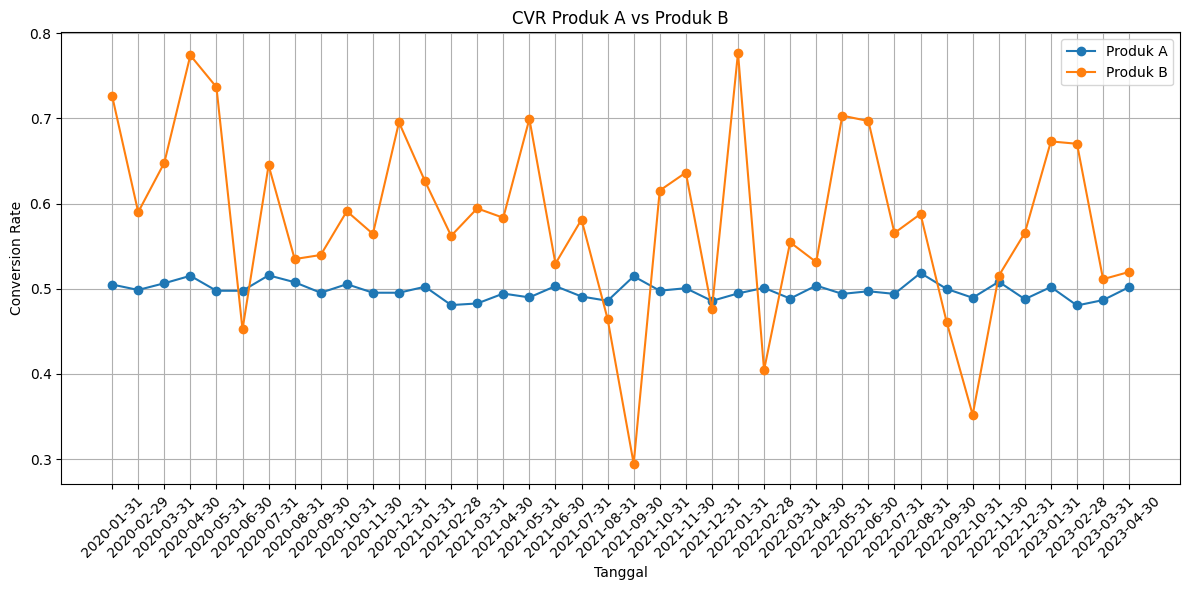

In [ ]:
#Plot time series untuk memahami tren dan fluktuasi
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Produk A'], label='Produk A', marker='o')
plt.plot(df['date'], df['Produk B'], label='Produk B', marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Conversion Rate')
plt.title('CVR Produk A vs Produk B')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Hitung statistik deskriptif dari tiap produk

print(df[['Produk A', 'Produk B']].describe())

        Produk A   Produk B
count  40.000000  40.000000
mean    0.497814   0.581254
std     0.009528   0.107789
min     0.480403   0.294701
25%     0.490658   0.527056
50%     0.497659   0.582337
75%     0.503296   0.653465
max     0.518523   0.776975
